# QA CA Two


### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For splitting dataset & regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
# Load dataset
df = pd.read_csv("milk_test.csv")

# Quick look at the first few rows
print(df.head())

# Check for data types and missing values
df.info()

# Basic descriptive statistics
df.describe()


    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0  6.6          35      1     0     1          0     254    high
1  6.6          36      0     1     0          1     253    high
2  8.5          70      1     1     1          1     246     low
3  9.5          34      1     1     0          1     255     low
4  6.6          37      0     0     0          0     255  medium
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


### Data Preprocessing

In [3]:
# Drop any rows with missing values if necessary (optional)
df.dropna(inplace=True)

# Let's confirm the columns
print(df.columns)


Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')


### EDA

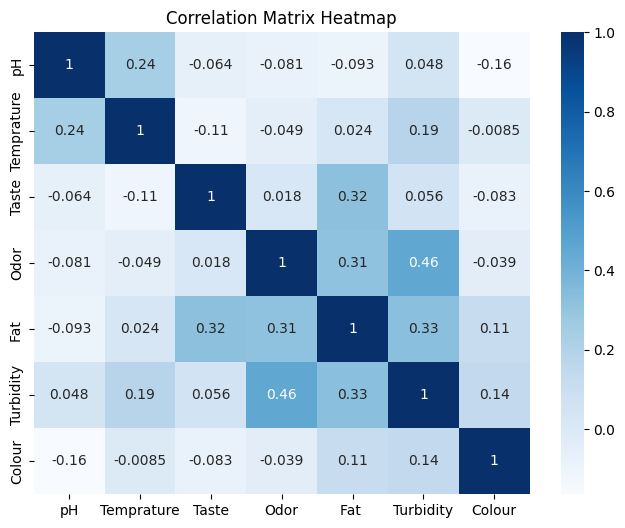

In [5]:
# Select only numeric columns for correlation
numeric_cols = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix Heatmap")
plt.show()


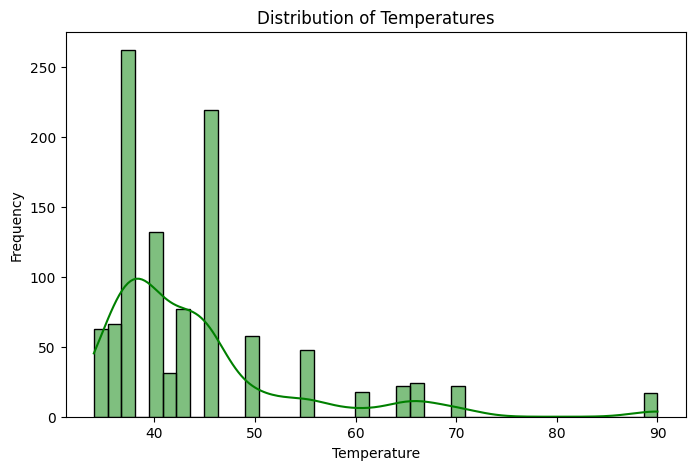

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Temprature'], kde=True, color='green')
plt.title("Distribution of Temperatures")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


In [19]:
X = df[['Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y = df['pH']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
# Create a Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Check the coefficients and intercept
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)


Coefficients: [ 0.03172068 -0.14431531 -0.34520526 -0.1606899   0.30212991 -0.06311032]
Intercept: 21.30874861879607


In [22]:
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate R-squared
r2 = lr_model.score(X_test, y_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE) manually
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {mse**0.5:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


R-squared: 0.0460
MSE: 1.6493
RMSE: 1.2842
MAE: 0.8362
MAPE: 15.59%
